In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_articles = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")
df_tran = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
df_cust = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")

# Analysis of articles

In [3]:
for i in df_articles.columns:
    print(i,len(df_articles[i].unique()) )

article_id 105542
product_code 47224
prod_name 45875
product_type_no 132
product_type_name 131
product_group_name 19
graphical_appearance_no 30
graphical_appearance_name 30
colour_group_code 50
colour_group_name 50
perceived_colour_value_id 8
perceived_colour_value_name 8
perceived_colour_master_id 20
perceived_colour_master_name 20
department_no 299
department_name 250
index_code 10
index_name 10
index_group_no 5
index_group_name 5
section_no 57
section_name 56
garment_group_no 21
garment_group_name 21
detail_desc 43405


## Number of articles of each index_name

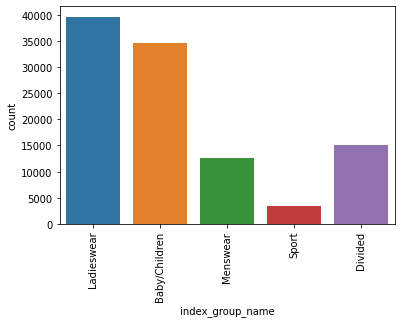

In [4]:
ax = sns.countplot(x="index_group_name", data = df_articles)
a = plt.xticks(rotation=90)

## Number of articles of each product type

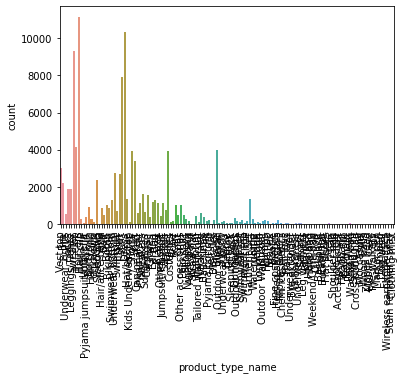

In [5]:
ax = sns.countplot(x="product_type_name", data = df_articles)
a = plt.xticks(rotation=90)

## Number of articles of each graphical appearance name

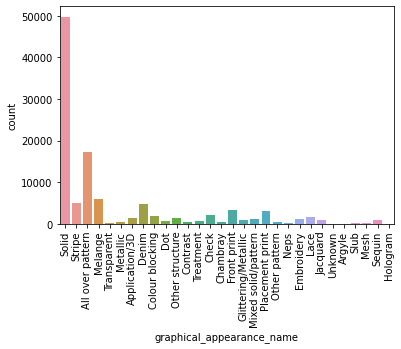

In [6]:
ax = sns.countplot(x="graphical_appearance_name", data = df_articles)
a = plt.xticks(rotation=90)

## Number of articles of each colour

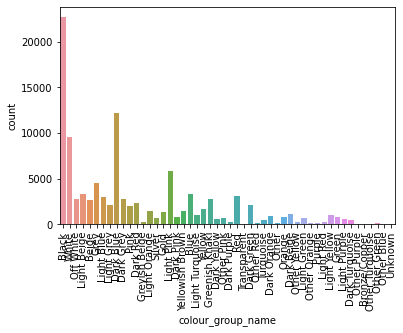

In [7]:
ax = sns.countplot(x="colour_group_name", data = df_articles)
a = plt.xticks(rotation=90)

# Analysis of customer

In [8]:
for i in df_cust.columns:
    print(i,len(df_cust[i].unique()) )

customer_id 1371980
FN 2
Active 2
club_member_status 4
fashion_news_frequency 5
age 85
postal_code 352899


In [9]:
df_cust.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [10]:
df_cust['FN'] = df_cust['FN'].fillna(0)
df_cust['Active'] = df_cust['Active'].fillna(0)
df_cust['age'] = df_cust['age'].fillna(0)
df_cust['club_member_status'] = df_cust['club_member_status'].fillna("No info")
df_cust['fashion_news_frequency'] = df_cust['fashion_news_frequency'].fillna("None")
df_cust['fashion_news_frequency'] = df_cust['fashion_news_frequency'].replace("NONE", "None")

## Analysis of club member status

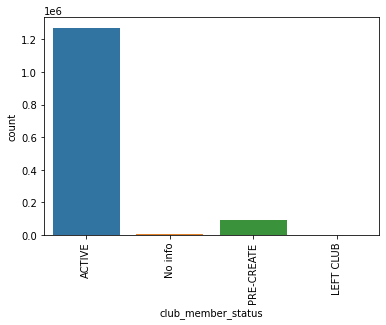

In [11]:
ax = sns.countplot(x="club_member_status", data = df_cust)
a = plt.xticks(rotation=90)

## Analysis of fashion news frequency

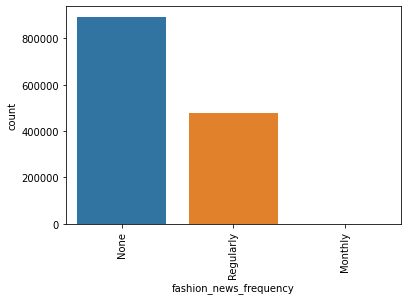

In [12]:
ax = sns.countplot(x="fashion_news_frequency", data = df_cust)
a = plt.xticks(rotation=90)

## Analysis of age

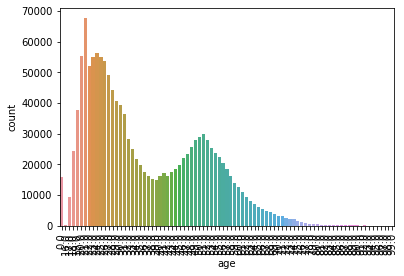

In [13]:
ax = sns.countplot(x="age", data = df_cust)
a = plt.xticks(rotation=90)

# Analysis of transaction

## Number of unique values each column has:

In [14]:
for i in df_tran.columns:
    print(i,len(df_tran[i].unique()) )

t_dat 734
customer_id 1362281
article_id 104547
price 9857
sales_channel_id 2


## Analysis of sales each month

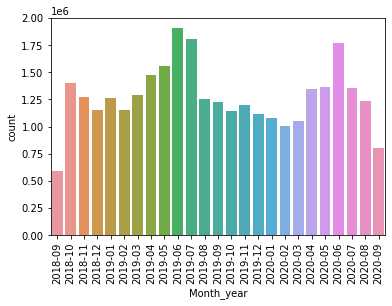

In [15]:
df_tran["Month_year"] = pd.to_datetime(df_tran.t_dat).dt.to_period('M')
ax = sns.countplot(x="Month_year", data = df_tran)
a = plt.xticks(rotation=90)

## Analysis of sales channel id

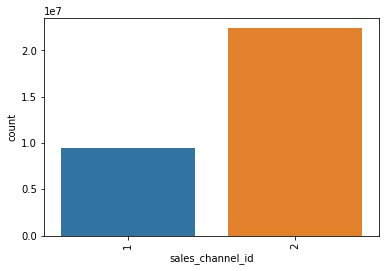

In [16]:
ax = sns.countplot(x="sales_channel_id", data = df_tran)
a = plt.xticks(rotation=90)

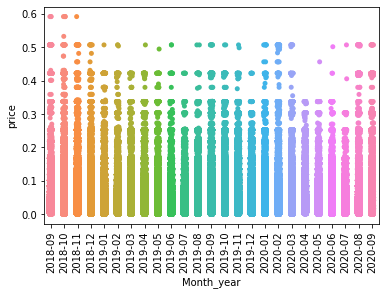

In [17]:
ax = sns.stripplot(x="Month_year", y = "price", data = df_tran)
a = plt.xticks(rotation=90)

In [18]:
df_tran_arti = pd.merge(
    df_tran, 
    df_articles[["article_id", "index_group_name", "product_type_name", "graphical_appearance_name", "colour_group_name"]], 
    how = "left", 
    on = "article_id"
)

In [19]:
df_tran_arti.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'Month_year', 'index_group_name', 'product_type_name',
       'graphical_appearance_name', 'colour_group_name'],
      dtype='object')

# Checking sales of product types

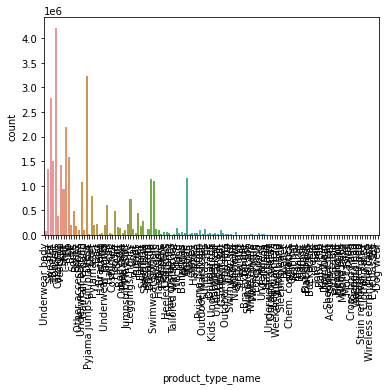

In [20]:
ax = sns.countplot(x="product_type_name", data = df_tran_arti)
a = plt.xticks(rotation=90)

In [21]:
df_tran_arti.t_dat = pd.to_datetime(df_tran_arti.t_dat)

In [22]:
a = df_tran_arti.loc[((df_tran_arti["t_dat"] > "2018-09-15") & (df_tran_arti["t_dat"] < "2018-10-01")) |
                    ((df_tran_arti["t_dat"] > "2019-09-15") & (df_tran_arti["t_dat"] < "2019-10-01")) |
                    ((df_tran_arti["t_dat"] > "2020-09-15") & (df_tran_arti["t_dat"] < "2020-10-01"))]

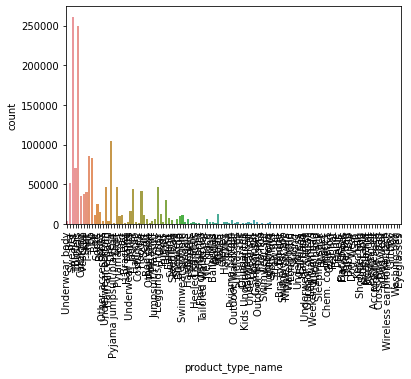

In [23]:
ax = sns.countplot(x="product_type_name", data = a)
a = plt.xticks(rotation=90)